In [25]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from pca import pca
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold, GridSearchCV
from sklearn.metrics import roc_curve,roc_auc_score,log_loss,accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE

In [6]:
df = pd.read_csv(r"C:\Users\Administrator.DAI-PC2\Downloads\Shubham\Practical Machine Learning\ClassWork\Cases\Glass Identification\Glass.csv")
le = LabelEncoder()
X = df.iloc[:,:-1]
y = le.fit_transform(df.iloc[:,-1])

In [ ]:
####Logistic

In [7]:
scaler = StandardScaler().set_output(transform='pandas')
prcomp = PCA().set_output(transform='pandas')
lr = LogisticRegression()

pipe = Pipeline([("SCL",scaler),("PCA",prcomp),("LR",lr)])
pipe.get_params()

In [16]:
kfold = StratifiedKFold(n_splits=5, shuffle=True,random_state=24)
params={'PCA__n_components':np.arange(2,10),'LR__C':np.linspace(0.001,3,5),'LR__multi_class':['ovr','multinomial']}
gcv = GridSearchCV(pipe,param_grid=params,cv=kfold,scoring='neg_log_loss')

gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)

{'LR__C': 0.75075, 'LR__multi_class': 'multinomial', 'PCA__n_components': 9}
-0.954645334455566


In [ ]:
#### Gaussian

In [19]:
scaler = StandardScaler().set_output(transform='pandas')
prcomp = PCA().set_output(transform='pandas')
nb = GaussianNB()

pipe = Pipeline([("SCL",scaler),("PCA",prcomp),("NB",nb)])
pipe.get_params()

{'memory': None,
 'steps': [('SCL', StandardScaler()), ('PCA', PCA()), ('NB', GaussianNB())],
 'verbose': False,
 'SCL': StandardScaler(),
 'PCA': PCA(),
 'NB': GaussianNB(),
 'SCL__copy': True,
 'SCL__with_mean': True,
 'SCL__with_std': True,
 'PCA__copy': True,
 'PCA__iterated_power': 'auto',
 'PCA__n_components': None,
 'PCA__n_oversamples': 10,
 'PCA__power_iteration_normalizer': 'auto',
 'PCA__random_state': None,
 'PCA__svd_solver': 'auto',
 'PCA__tol': 0.0,
 'PCA__whiten': False,
 'NB__priors': None,
 'NB__var_smoothing': 1e-09}

In [20]:
kfold = StratifiedKFold(n_splits=5, shuffle=True,random_state=24)
params={'PCA__n_components':np.arange(2,10)}
gcv = GridSearchCV(pipe,param_grid=params,cv=kfold,scoring='neg_log_loss')

gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)

C:\Users\Administrator.DAI-PC2\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\Administrator.DAI-PC2\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\Administrator.DAI-PC2\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\Administrator.DAI-PC2\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\Administrator.DAI-PC2\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to

{'PCA__n_components': 2}
-1.4868119307408088


C:\Users\Administrator.DAI-PC2\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


In [ ]:
#### Random Forest

In [22]:
scaler = StandardScaler().set_output(transform='pandas')
prcomp = PCA().set_output(transform='pandas')
rf = RandomForestClassifier()

pipe = Pipeline([("SCL",scaler),("PCA",prcomp),("Tree",rf)])
pipe.get_params()

{'memory': None,
 'steps': [('SCL', StandardScaler()),
  ('PCA', PCA()),
  ('Tree', RandomForestClassifier())],
 'verbose': False,
 'SCL': StandardScaler(),
 'PCA': PCA(),
 'Tree': RandomForestClassifier(),
 'SCL__copy': True,
 'SCL__with_mean': True,
 'SCL__with_std': True,
 'PCA__copy': True,
 'PCA__iterated_power': 'auto',
 'PCA__n_components': None,
 'PCA__n_oversamples': 10,
 'PCA__power_iteration_normalizer': 'auto',
 'PCA__random_state': None,
 'PCA__svd_solver': 'auto',
 'PCA__tol': 0.0,
 'PCA__whiten': False,
 'Tree__bootstrap': True,
 'Tree__ccp_alpha': 0.0,
 'Tree__class_weight': None,
 'Tree__criterion': 'gini',
 'Tree__max_depth': None,
 'Tree__max_features': 'sqrt',
 'Tree__max_leaf_nodes': None,
 'Tree__max_samples': None,
 'Tree__min_impurity_decrease': 0.0,
 'Tree__min_samples_leaf': 1,
 'Tree__min_samples_split': 2,
 'Tree__min_weight_fraction_leaf': 0.0,
 'Tree__monotonic_cst': None,
 'Tree__n_estimators': 100,
 'Tree__n_jobs': None,
 'Tree__oob_score': False,
 'Tree

In [23]:
kfold = StratifiedKFold(n_splits=5, shuffle=True,random_state=24)
params={'PCA__n_components':np.arange(4,10)}
gcv = GridSearchCV(pipe,param_grid=params,cv=kfold,scoring='neg_log_loss')

gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)

{'PCA__n_components': 8}
-0.6998327037371094


In [24]:
################ t-sne ###########

<Axes: xlabel='tsne0', ylabel='tsne1'>

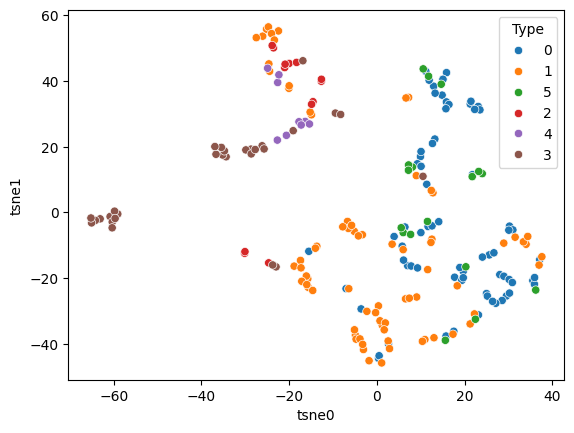

In [58]:
tsne = TSNE(n_components=2, random_state=24, perplexity=5).set_output(transform='pandas')
emb_tsne = tsne.fit_transform(X)
emb_tsne['Type'] = y.astype(str)
sns.scatterplot(data=emb_tsne,x='tsne0',y='tsne1',hue='Type')

In [ ]:
#### logistic with T-SNE

In [57]:
lr = LogisticRegression()
params={}
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=24)
gcv = GridSearchCV(lr,param_grid=params, cv=kfold,scoring='neg_log_loss')

tsne = TSNE(n_components=2, random_state=24, perplexity=5).set_output(transform='pandas')
emb_tsne = tsne.fit_transform(X)

gcv.fit(emb_tsne,y)
print(gcv.best_params_)
print(gcv.best_score_)

{}
-1.026791716420999


C:\Users\Administrator.DAI-PC2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Administrator.DAI-PC2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht